# Phase 2 project
## Airplane 

#### import libraries and read train data
###### We use 2k data for test mode and others for training

In [132]:
import numpy as np
import pandas as pd

data = pd.read_csv('/home/awmirma/Documents/UNI/semesters/4021/ML/PROJECTS/DT/Airplane.csv')
full_data = [data]


In [133]:
col_names = data.columns.values.tolist()
data_col_uni = []
# print(col_names)
for column in col_names :
    data_col_uni.append(data[column].unique()) 

for i in range(len(data_col_uni)) :
    print({col_names[i]} , "has ", len(data_col_uni[i]), "different types of data")
    # print("---------------------------------------------------------------------------")

{'Unnamed: 0'} has  103904 different types of data
{'id'} has  103904 different types of data
{'Gender'} has  2 different types of data
{'Customer Type'} has  2 different types of data
{'Age'} has  75 different types of data
{'Type of Travel'} has  2 different types of data
{'Class'} has  3 different types of data
{'Flight Distance'} has  3802 different types of data
{'Inflight wifi service'} has  6 different types of data
{'Departure/Arrival time convenient'} has  6 different types of data
{'Ease of Online booking'} has  6 different types of data
{'Gate location'} has  6 different types of data
{'Food and drink'} has  6 different types of data
{'Online boarding'} has  6 different types of data
{'Seat comfort'} has  6 different types of data
{'Inflight entertainment'} has  6 different types of data
{'On-board service'} has  6 different types of data
{'Leg room service'} has  6 different types of data
{'Baggage handling'} has  5 different types of data
{'Checkin service'} has  6 differe

## Cleaning data


### Cleaning discrete data

In [134]:
# Cleaning for all two types features

for dataset in full_data :
    dataset['Gender'] = dataset['Gender'].map({'Male':1 , 'Female' : 0}).astype(int)
    dataset['Customer Type'] = dataset['Customer Type'].map({'Loyal Customer':1 , 'disloyal Customer' : 0}).astype(int)
    dataset['Type of Travel'] = dataset['Type of Travel'].map({'Personal Travel':1 , 'Business travel' : 0}).astype(int)
    dataset['satisfaction'] = dataset['satisfaction'].map({'satisfied':1 , 'neutral or dissatisfied' : 0}).astype(int)
for dataset in full_data:
    i = 0
    # mapping_dict = {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5}
    for col_name in col_names :
        if col_name == 'Class':
            dataset[col_name] = dataset[col_name].map({'Eco':0 , 'Eco Plus' : 1 , 'Business' : 2}).astype(int)

        if dataset.columns.get_loc(col_name)>= 11 and dataset.columns.get_loc(col_name) <=22:
            # dataset[col_name] = dataset[col_name].map(mapping_dict).astype(int)
            dataset.loc[dataset[col_name] == 1 , col_name]   = 0
            dataset.loc[dataset[col_name] == 2 , col_name]   = 1
            dataset.loc[dataset[col_name] == 3 , col_name]   = 2
            dataset.loc[dataset[col_name] == 4 , col_name]   = 3
            dataset.loc[dataset[col_name] == 5 , col_name]   = 4
            dataset.loc[dataset[col_name] == 6 , col_name]   = 5
        
        # for i in range()
            # continue
data.head()
# print(data)
# column_i = np.take(data, 13, axis=1)
 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,1,13,1,1,460,3,4,...,4,3,2,3,3,4,4,25,18.0,0
1,1,5047,1,0,25,0,2,235,3,2,...,0,0,4,2,0,3,0,0,6.0,0
2,2,110028,0,1,26,0,2,1142,2,2,...,4,3,2,3,3,3,4,0,0.0,1
3,3,24026,0,1,25,0,2,562,2,5,...,1,1,4,2,0,3,1,11,9.0,0
4,4,119299,1,1,61,0,2,214,3,3,...,2,2,3,3,2,2,2,0,0.0,1


### Cleaning continuous data

#### Cleaning Age feature

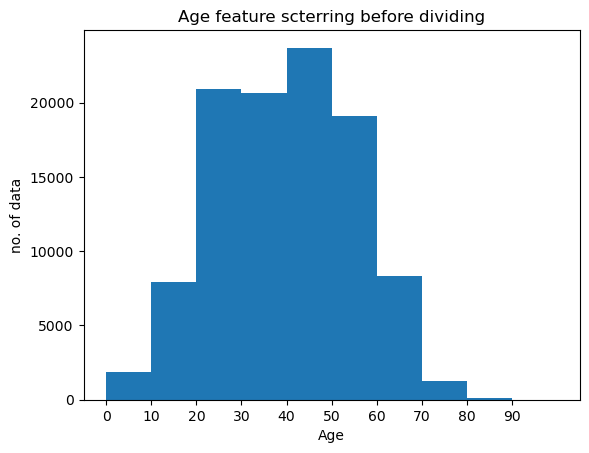

10.0 - 20.0
20.0 - 22.5
22.5 - 25.0
25.0 - 27.5
27.5 - 30.0
30.0 - 32.5
32.5 - 35.0
35.0 - 37.5
37.5 - 40.0
40.0 - 42.5
42.5 - 45.0
45.0 - 47.5
47.5 - 50.0
50.0 - 53.333333333333336
53.333333333333336 - 56.66666666666667
56.666666666666664 - 60.0
60.0 - 70.0


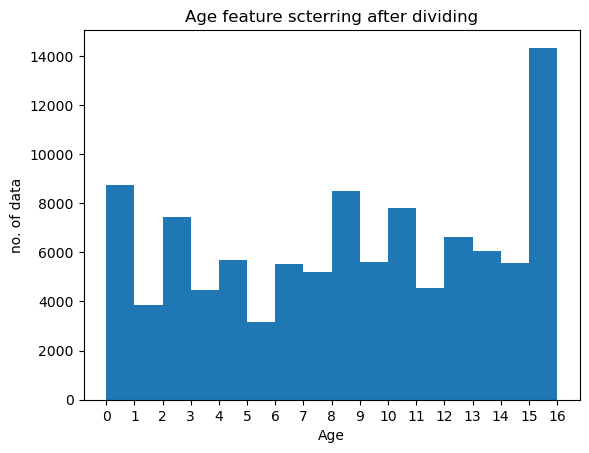

In [135]:
# Claning Age feature
from matplotlib import pyplot as plt
import numpy as np
fig,aA = plt.subplots(1,1)
aA.hist(data['Age'], bins = [0,10,20,30,40,50,60,70,80,90,100])
aA.set_title("Age feature scterring before dividing")
aA.set_xticks([0,10,20,30,40,50,60,70,80,90,])
aA.set_xlabel('Age')
aA.set_ylabel('no. of data')
plt.show()
# plt.savefig("Age_feature_scterring_before_dividing.png")

# dividing 
# we get +5000 overflow and should split into smaller range
split_CA = [0,0,0,0,0,0,0,0,0,0]
for i in range(10):
    j = i*10 
    k = j+10
    split_CA[i] = int(len(data[(data['Age'] > j) & (data['Age'] <= k)]) / 5000)

# print(split_CA)
x_axis = []
for dataset in full_data :
    start = 0
    end = 0 
    count = 0
    for i in range(len(split_CA)) :
        for j in range(0,split_CA[i]):   
            start = (i*10)+j*(10/split_CA[i]) 
            end = start + (10/split_CA[i])
            x_axis.append("%.1f" % start)
            print (start , '-',end)
            dataset.loc[(dataset['Age'] > start ) & (dataset['Age'] <= end), 'Age'] = count
            # print(count)
            count +=1
# data.head()
# print(x_axis)
fig , aAS = plt.subplots(1,1)
aAS.hist(data['Age'], bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
aAS.set_title("Age feature scterring after dividing")
aAS.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
aAS.set_xlabel('Age')
aAS.set_ylabel('no. of data')
plt.show()
# plt.savefig("Age_feature_scterring_after_dividing.png")


    




#### Cleaning flight distance feature

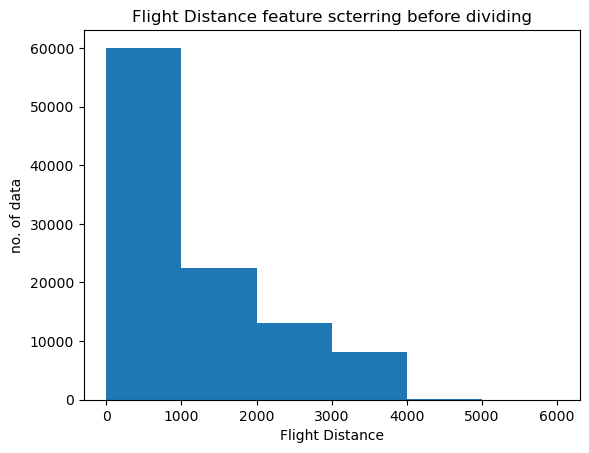

0.0 - 166.66666666666666
166.66666666666666 - 333.3333333333333
333.3333333333333 - 500.0
500.0 - 666.6666666666666
666.6666666666666 - 833.3333333333333
833.3333333333333 - 999.9999999999999
1000.0 - 1500.0
1500.0 - 2000.0
2000.0 - 3000.0


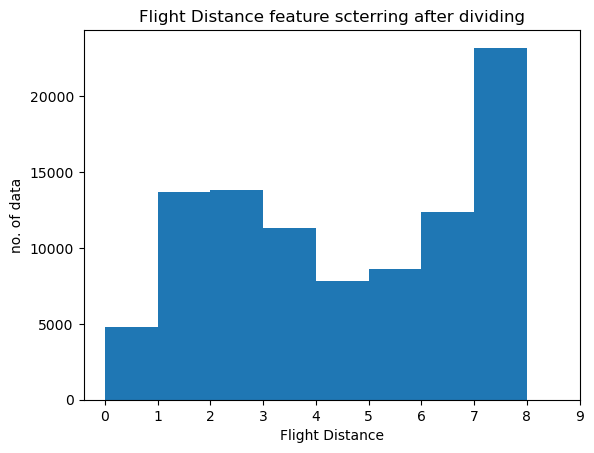

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,1,0,1,1,2,3,4,...,4,3,2,3,3,4,4,25,18.0,0
1,1,5047,1,0,2,0,2,1,3,2,...,0,0,4,2,0,3,0,0,6.0,0
2,2,110028,0,1,3,0,2,6,2,2,...,4,3,2,3,3,3,4,0,0.0,1
3,3,24026,0,1,2,0,2,3,2,5,...,1,1,4,2,0,3,1,11,9.0,0
4,4,119299,1,1,16,0,2,1,3,3,...,2,2,3,3,2,2,2,0,0.0,1


In [136]:
#find minimum and maximum
minimum = data['Flight Distance'].min()
maximum = data['Flight Distance'].max()

fig,aFD = plt.subplots(1,1)
aFD.hist(data['Flight Distance'], bins = [0,1000,2000,3000,4000,5000,6000])
aFD.set_title("Flight Distance feature scterring before dividing")
aFD.set_xticks([0,1000,2000,3000,4000,5000,6000])
aFD.set_xlabel('Flight Distance')
aFD.set_ylabel('no. of data')
plt.show()
# plt.savefig("FDB.png")

split_CFD = [0,0,0,0,0,0,0]
for i in range(7):
    j = i*1000
    k = j+1000
    split_CFD[i] = int(len(data[(data['Flight Distance'] > j) & (data['Flight Distance'] <= k)]) / 10000)

# print(split_CFD)
x_axis = []
count = 0
for dataset in full_data :
    start = 0
    end = 0 
    
    for i in range(len(split_CFD)) :
        for j in range(0,split_CFD[i]):   
            start = (i*1000)+j*(1000/split_CFD[i]) 
            end = start + (1000/split_CFD[i])
            x_axis.append("%.1f" % start)
            print (start , '-',end)
            dataset.loc[(dataset['Flight Distance'] > start ) & (dataset['Flight Distance'] <= end), 'Flight Distance'] = count
            # print(count)
            count +=1

fig , aFDS = plt.subplots(1,1)
aFDS.hist(data['Flight Distance'], bins = range(0,count))
aFDS.set_title("Flight Distance feature scterring after dividing")
aFDS.set_xticks(range(0,count+1))
aFDS.set_xlabel('Flight Distance')
aFDS.set_ylabel('no. of data')
plt.show()
# plt.savefig("FDA.png")


data.head()




#### Cleaning delay attribute
##### departure and arrival

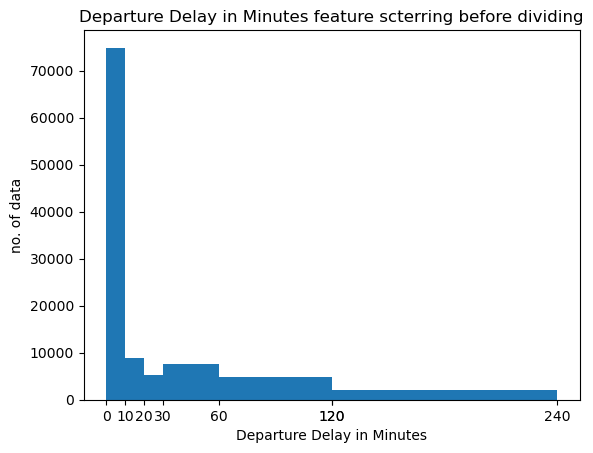

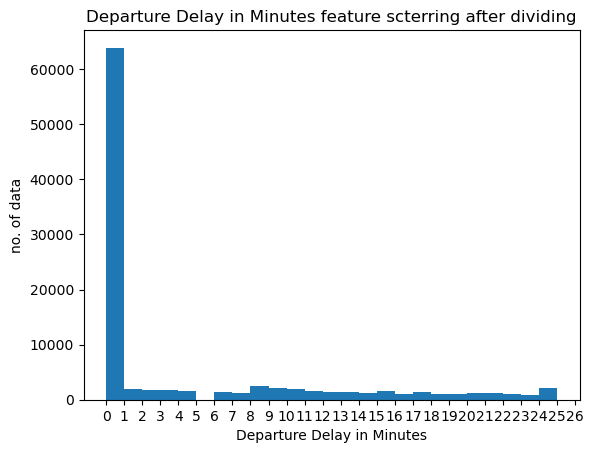

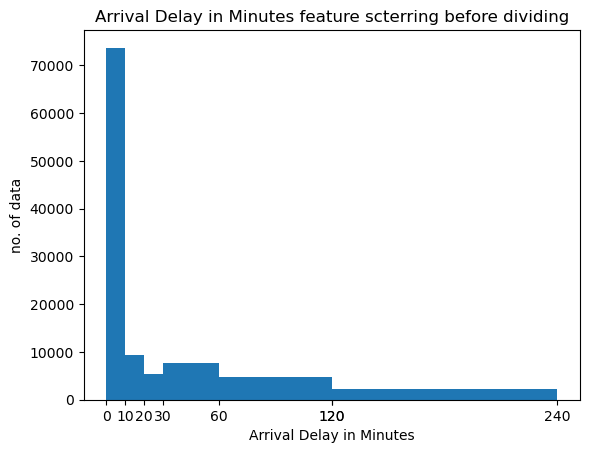

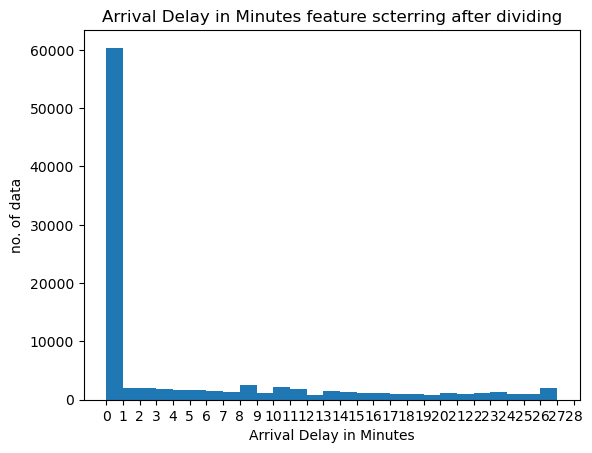

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,1,0,1,1,2,3,4,...,4,3,2,3,3,4,4,15,13.0,0
1,1,5047,1,0,2,0,2,1,3,2,...,0,0,4,2,0,3,0,0,5.0,0
2,2,110028,0,1,3,0,2,6,2,2,...,4,3,2,3,3,3,4,0,0.0,1
3,3,24026,0,1,2,0,2,3,2,5,...,1,1,4,2,0,3,1,9,8.0,0
4,4,119299,1,1,16,0,2,1,3,3,...,2,2,3,3,2,2,2,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,15138,0,1,5,0,0,6,4,1,...,3,3,2,0,4,1,3,19,21.0,1
96,96,123589,0,1,8,1,0,7,4,5,...,4,1,1,2,2,0,4,10,13.0,0
97,97,114534,1,1,0,1,2,2,3,1,...,2,1,0,2,0,2,2,0,0.0,0
98,98,93076,0,1,0,1,1,1,1,5,...,4,4,0,0,2,3,4,25,27.0,0


In [137]:
#departure

#find minimum and maximum
# minimum = data['Departure Delay in Minutes'].min()
# maximum = data['Departure Delay in Minutes'].max()

fig,aDD = plt.subplots(1,1)
aDD.hist(data['Departure Delay in Minutes'], bins = [0,10,20,30,60,120,240,])
aDD.set_title("Departure Delay in Minutes feature scterring before dividing")
aDD.set_xticks([0,10,20,30,60,120,120,240,])
aDD.set_xlabel('Departure Delay in Minutes')
aDD.set_ylabel('no. of data')
plt.show()
# plt.savefig("DDB.png")

split_CDD = [0,0,0,0,0,0,0]
for i in range(7):
    j = i*5
    k = j+5
    # print(len(data[(data['Departure Delay in Minutes'] > j) & (data['Departure Delay in Minutes'] <= k)])/1000)
    split_CDD[i] = int(len(data[(data['Departure Delay in Minutes'] > j) & (data['Departure Delay in Minutes'] <= k)]) / 1000)

# print(split_CDD)
x_axis = []
count = 0
for dataset in full_data :
    start = 0
    end = 0 
    for i in range(len(split_CDD)) :
        for j in range(0,split_CDD[i]):   
            start = (i*10)+j*(10/split_CDD[i]) 
            end = start + (10/split_CDD[i])
            x_axis.append("%.1f" % start)
            # print (start , '-',end)
            dataset.loc[(dataset['Departure Delay in Minutes'] > start ) & (dataset['Departure Delay in Minutes'] <= end), 'Departure Delay in Minutes'] = count
            # print(count)
            count +=1

fig , aDDS = plt.subplots(1,1)
aDDS.hist(data['Departure Delay in Minutes'], bins = range(0,count))
aDDS.set_title("Departure Delay in Minutes feature scterring after dividing")
aDDS.set_xticks(range(0,count+1))
aDDS.set_xlabel('Departure Delay in Minutes')
aDDS.set_ylabel('no. of data')
plt.show()
# plt.savefig("DDA.png")

# data.head(100)



#Arrival

#find minimum and maximum
# minimum = data['Arrival Delay in Minutes'].min()
# maximum = data['Arrival Delay in Minutes'].max()

fig,aDD = plt.subplots(1,1)
aDD.hist(data['Arrival Delay in Minutes'], bins = [0,10,20,30,60,120,240,])
aDD.set_title("Arrival Delay in Minutes feature scterring before dividing")
aDD.set_xticks([0,10,20,30,60,120,120,240,])
aDD.set_xlabel('Arrival Delay in Minutes')
aDD.set_ylabel('no. of data')
plt.show()
# plt.savefig("ADB.png")

split_CAD = [0,0,0,0,0,0,0]
for i in range(7):
    j = i*5
    k = j+5
    # print(len(data[(data['Departure Delay in Minutes'] > j) & (data['Departure Delay in Minutes'] <= k)])/1000)
    split_CAD[i] = int(len(data[(data['Arrival Delay in Minutes'] > j) & (data['Arrival Delay in Minutes'] <= k)]) / 1000)

# print(split_CAD)
x_axis = []
count = 0
for dataset in full_data :
    start = 0
    end = 0 
    for i in range(len(split_CAD)) :
        for j in range(0,split_CAD[i]):   
            start = (i*10)+j*(10/split_CAD[i]) 
            end = start + (10/split_CAD[i])
            x_axis.append("%.1f" % start)
            # print (start , '-',end)
            dataset.loc[(dataset['Arrival Delay in Minutes'] > start ) & (dataset['Arrival Delay in Minutes'] <= end), 'Arrival Delay in Minutes'] = int(count)
            # print(count)
            count +=1

fig , aADS = plt.subplots(1,1)
aADS.hist(data['Arrival Delay in Minutes'], bins = range(0,count))
aADS.set_title("Arrival Delay in Minutes feature scterring after dividing")
aADS.set_xticks(range(0,count+1))
aADS.set_xlabel('Arrival Delay in Minutes')
aADS.set_ylabel('no. of data')
plt.show()
# plt.savefig("ADA.png")

data.head(100)





### Delete rows with NaN value

In [138]:

for dataset in full_data :
    for col_name in col_names :
        dataset.dropna(subset=[col_name], inplace=True)

print("Rows with NaN values deleted")

Rows with NaN values deleted


#### remove id and unnamed column

In [139]:
# removing the desired column
col_names.remove('id')
col_names.remove('Unnamed: 0')
 
my_cols = list(col_names)
data = data[my_cols]
 
# data.head(10)


test_data = data[:2000]
train_data = data[2000:]


train_data.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2003,0,1,9,0,2,6,3,5,3,2,...,3,3,4,3,2,3,3,0,0.0,1
2005,1,1,0,1,0,3,3,5,3,3,...,4,3,2,4,4,4,4,11,23.0,0
2006,0,1,4,0,2,5,5,5,5,4,...,3,4,3,4,4,4,3,0,0.0,1
2007,0,1,12,0,2,5,4,4,4,3,...,3,3,3,3,4,3,3,23,23.0,1
2008,0,1,8,0,2,7,3,3,3,2,...,3,3,3,3,3,3,3,0,0.0,1
2009,1,1,71,0,1,1,2,1,1,0,...,0,3,3,3,2,2,0,0,0.0,0
2010,0,1,9,0,2,1,2,3,3,2,...,1,1,1,1,3,1,2,0,0.0,0
2011,0,1,15,0,2,8,5,5,1,4,...,3,3,3,3,2,3,2,0,0.0,1
2012,1,1,6,0,2,8,4,2,3,2,...,3,3,3,3,2,3,0,23,15.0,0
2013,0,1,10,0,1,2,2,3,3,2,...,1,1,1,1,4,1,1,0,8.0,1


## Train and build the tree using entropy/gini index and information gain 

In [140]:
# Class for nodes in the decision tree
class DecisionTreeNode:
    def __init__(self, feature_index=None, value=None, children=None, information_gain=None):
        self.feature_index = feature_index
        self.value = value
        self.children = children
        self.information_gain = information_gain

# Class for the decision tree
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, pruning_threshold=0.01):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.pruning_threshold = pruning_threshold

    # Fit the decision tree on the training data
    def fit(self, X, y, depth=0):
        # Base case: if conditions are met, create a leaf node
        if len(set(y)) == 1 or depth == self.max_depth or len(X) < self.min_samples_split:
            most_common_label = np.bincount(y).argmax()
            return DecisionTreeNode(value=most_common_label)

        # Find the best split based on information gain
        best_feature_index, best_value, best_information_gain = self.find_best_split(X, y)

        # If no good split is found, create a leaf node
        if best_feature_index is None or best_information_gain < self.pruning_threshold:
            most_common_label = np.bincount(y).argmax()
            return DecisionTreeNode(value=most_common_label)

        # Split the data and create child nodes
        child_nodes = []
        unique_values = np.unique(X[:, best_feature_index])
        for value in unique_values:
            indices = X[:, best_feature_index] == value
            X_child, y_child = X[indices], y[indices]
            child_node = self.fit(X_child, y_child, depth + 1)
            child_nodes.append((value, child_node))

        return DecisionTreeNode(feature_index=best_feature_index, value=None, children=child_nodes, information_gain=best_information_gain)

    # Calculate entropy
    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    # Calculate Gini index
    def gini_index(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = (counts / len(y)) ** 2
        gini_index = 1 - np.sum(probabilities)
        return gini_index

    # Calculate information gain
    def information_gain(self, y, subsets, gini=False):
        if gini:
            total_gini_index = self.gini_index(y)
            weighted_gini_index = 0
            for subset in subsets:
                subset_size = len(subset)
                weighted_gini_index += (subset_size / len(y)) * self.gini_index(subset)
            return total_gini_index - weighted_gini_index
        else:
            total_entropy = self.entropy(y)
            weighted_entropy = 0
            for subset in subsets:
                subset_size = len(subset)
                weighted_entropy += subset_size / len(y) * self.entropy(subset)
            return total_entropy - weighted_entropy

    # Find the best split in the data
    def find_best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None, None

        num_classes = len(set(y))
        best_feature_index = None
        best_value = None
        best_information_gain = -1

        for feature_index in range(n):
            values = np.unique(X[:, feature_index])
            subsets = [y[X[:, feature_index] == value] for value in values]
            information_gain = self.information_gain(y, subsets)

            if information_gain > best_information_gain:
                best_feature_index = feature_index
                best_value = values
                best_information_gain = information_gain

        return best_feature_index, best_value, best_information_gain

    # Predict using the decision tree
    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x, node=None):
        if node is None:
            node = self.tree

        if node.children is None:
            return node.value

        feature_value = x[node.feature_index]

        for value, child_node in node.children:
            if feature_value == value:
                return self._predict(x, child_node)

    # Print the decision tree structure
    def print_tree(self, node=None, depth=0):
        if node is None:
            node = self.tree

        if node.feature_index is not None:
            feature_name = col_names[node.feature_index]
            print("| " * depth + feature_name)
            print("| " * (depth + 1) + f"Information Gain: {node.information_gain:.4f}")

            for value, child_node in node.children:
                print("| " * (depth + 1) + f"Value: {value}")
                self.print_tree(child_node, depth + 2)
        else:
            print("| " * depth + f"Class: {node.value}")

# Prepare data
X_train = train_data.drop(columns=['satisfaction']).values
Y_train = train_data['satisfaction'].values

X_test = test_data.drop(columns=['satisfaction']).values
Y_test = test_data['satisfaction'].values

# Create and fit the decision tree
tree = DecisionTree(max_depth=10)
tree.tree = tree.fit(X_train, Y_train)

# Print the decision tree structure
tree.print_tree()


Online boarding
| Information Gain: 0.1815
| Value: 0.0
| | Inflight wifi service
| | | Information Gain: 0.2420
| | | Value: 0.0
| | | | Class: 1
| | | Value: 1.0
| | | | Class: 0
| | | Value: 2.0
| | | | Departure/Arrival time convenient
| | | | | Information Gain: 0.0837
| | | | | Value: 0.0
| | | | | | Class: 0
| | | | | Value: 1.0
| | | | | | Arrival Delay in Minutes
| | | | | | | Information Gain: 0.0134
| | | | | | | Value: 0.0
| | | | | | | | Class: 0
| | | | | | | Value: 1.0
| | | | | | | | Age
| | | | | | | | | Information Gain: 0.2188
| | | | | | | | | Value: 0.0
| | | | | | | | | | Class: 0
| | | | | | | | | Value: 1.0
| | | | | | | | | | Class: 0
| | | | | | | | | Value: 2.0
| | | | | | | | | | Class: 0
| | | | | | | | | Value: 6.0
| | | | | | | | | | Class: 0
| | | | | | | | | Value: 7.0
| | | | | | | | | | Class: 0
| | | | | | | | | Value: 8.0
| | | | | | | | | | Class: 0
| | | | | | | | | Value: 15.0
| | | | | | | | | | Class: 0
| | | | | | | | | Value: 16.0
| | | | | |

In [141]:
def predict_accuracy(tree, X_test, y_test):
    y_pred = tree.predict(X_test)
    correct_predictions = 0

    for pred, true_label in zip(y_pred, y_test):
        if pred == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / len(y_test)
    return y_pred, accuracy

# Make predictions and calculate accuracy
y_pred, accuracy = predict_accuracy(tree, X_test, Y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.55%
